In [4]:
import pandas as pd

Data Clean up

In [5]:
df1= pd.read_csv("./data/title_basics.tsv",sep='\t')
df= pd.read_csv("./data/title_rating.tsv",sep='\t')
df2 = df1.merge(df,how = 'inner',on='tconst')

c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df= pd.read_csv("./data/title_akas.tsv",sep='\t')
df = df.groupby(by="titleId").count()
df.reset_index(inplace=True)
df=df[['titleId','language']]
df= df.rename(columns={'titleId':'tconst'})
df2 = df2.merge(df, how = 'left', on = 'tconst')

c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df= pd.read_csv("./data/title_crew.tsv",sep='\t')
df2 =df2.merge(df,how='left',on='tconst')

In [8]:
df= pd.read_csv("./data/title_episode.tsv",sep='\t')
df2=df2.merge(df,how='left',on='tconst')

In [9]:
#replace NA , \N
df2.parentTconst.fillna("movie",inplace=True)
df2.seasonNumber.fillna(0,inplace=True)
df2.seasonNumber.replace(r"\\N",0,regex=True,inplace=True)
df2.episodeNumber.replace(r"\\N",0,regex=True,inplace=True)
df2.episodeNumber.fillna(0,inplace=True)
df2.writers.replace(r"\\N","unknown",regex=True,inplace=True)
df2.directors.replace(r"\\N","unknown",regex=True,inplace=True)
df2.language.fillna(1,inplace=True)
df2.genres.replace(r"\\N","unknown",regex=True,inplace=True)
df2.runtimeMinutes.replace(r"\\N",0,regex=True,inplace=True)
df2.endYear.replace(r"\\N",0,regex=True,inplace=True)
df2.startYear.replace(r"\\N",0,regex=True,inplace=True)
df2.runtimeMinutes.replace("Game-Show,Reality-TV",0,inplace=True)
df2.runtimeMinutes.replace("Game-Show",0,inplace=True)
df2.runtimeMinutes=pd.to_numeric(df2.runtimeMinutes)
#convert data type
df2.isAdult=pd.to_numeric(df2.isAdult)
df2.startYear=pd.to_numeric(df2.startYear)
df2.endYear=pd.to_numeric(df2.endYear)
df2.seasonNumber=pd.to_numeric(df2.seasonNumber)
df2.episodeNumber=pd.to_numeric(df2.episodeNumber)
df2.to_csv('./data/imdbdata.csv',index=False)
df2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,language,directors,writers,parentTconst,seasonNumber,episodeNumber
0,tt0000001,short,Carmencita,Carmencita,0,1894,0,1,"Documentary,Short",5.7,1914,8.0,nm0005690,unknown,movie,0,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0,5,"Animation,Short",5.8,259,8.0,nm0721526,unknown,movie,0,0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,0,4,"Animation,Comedy,Romance",6.5,1720,9.0,nm0721526,unknown,movie,0,0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,0,12,"Animation,Short",5.6,172,8.0,nm0721526,unknown,movie,0,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,0,1,"Comedy,Short",6.2,2536,12.0,nm0005690,unknown,movie,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263401,tt9916690,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,0,10,"Adventure,Animation,Comedy",6.5,6,1.0,nm0996406,"nm1482639,nm2586970",tt0985991,3,47
1263402,tt9916720,short,The Nun 2,The Nun 2,0,2019,0,10,"Comedy,Horror,Mystery",5.3,262,14.0,nm10538600,unknown,movie,0,0
1263403,tt9916730,movie,6 Gunn,6 Gunn,0,2017,0,116,unknown,8.4,6,1.0,nm10538612,nm10538612,movie,0,0
1263404,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,0,43,"Family,Game-Show,Reality-TV",6.8,21,7.0,unknown,unknown,tt1442550,10,15


In [10]:
#consolidate the movie data files
# import os

# directory = os.fsencode('./themoviedb')
# count = 0
    
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
     
#     file = (f'./themoviedb/{filename}')
#     if count==0:
#         df = pd.read_csv(file)
#         count+=1
#     else:
#         df1 =pd.read_csv(file)
#         df = pd.concat([df,df1],ignore_index=True)
        
# df4 = pd.read_csv('./Julia/themoviedb_id_500000_to_600000.csv',
#                  lineterminator='\n')
# df = pd.concat([df,df4],ignore_index=True)
# df.to_csv('./data/themoviedb.csv', index=False)

In [11]:
#consolidate omdb data files
# import os

# directory = os.fsencode('./omdb')
# count = 0
    
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
     
#     file = (f'./omdb/{filename}')
#     if count==0:
#         df = pd.read_csv(file)
#         count+=1
#     else:
#         df1 =pd.read_csv(file)
#         df = pd.concat([df,df1],ignore_index=True)
# df.to_csv('./data/omdb.csv', index=False)

Data merging

In [12]:
#read and merge 3 data sources
df2 = pd.read_csv('./data/imdbdata.csv')
df = pd.read_csv('./data/themoviedb.csv')
df.rename(columns={'imdb_id':'tconst'},inplace=True)
df2= df2.merge(df,how='inner',on='tconst')
df2=df2.loc[df2.startYear>=2017,:]
df2=df2.loc[df2.titleType=='movie',:]
# df2.to_csv('./data/subset_movie_data_new.csv',index=False)
df = pd.read_csv('./data/omdb.csv')
df2= df2.merge(df,how='inner',on='tconst')

In [13]:
#export to raw data
df2.to_csv('./data/raw_consolidate_data.csv',index=False)


Data manipulation / transformation

In [77]:
#clean up raw data
df2 =pd.read_csv('./data/raw_consolidate_data.csv')
# remove columns
df2=df2.drop(['titleType','originalTitle','endYear','directors','writers','seasonNumber',
              'episodeNumber','parentTconst','themoviedb_id','status','Director', 'Writer',
              'overview','Plot','DVD','production_companies_id','numVotes','rating1source',
       'rating1value', 'rating2source', 'rating2value', 'rating3source',
       'rating3value','Metascore','popularity','original_language','production_companies_name','production_countries',
       'Awards','BoxOffice','revenue','vote_average','vote_count'],axis=1)
#filter out aldult movies
df2 =df2.loc[(df2.isAdult==0) ,:]
df2['language']=df2['language'].astype(int)
df2.belongs_to_collection.fillna(0,inplace=True)
#conver flag if movie is in collection
df2['is_in_collection'] = df2.apply(lambda x: 0 if x.belongs_to_collection==0 else 1, axis=1)
#take month of release
x=df2.Released.str.split(' ',expand=True)
df2['release_month'] = x.iloc[:,1]
df2['release_month'] =  pd.to_datetime(df2['release_month'], format='%b')
df2['release_month'] = df2.apply(lambda x: x.release_month.month , axis=1)
df2.release_month.fillna(0,inplace=True)
df2['release_month']=df2['release_month'].astype(int)
df2.rename(columns={'language':'number_of_languages'},inplace=True)

#count number of popular actors/actress
df2.Actors = df2.Actors.str.lower()
x = df2.Actors.str.split(', ',expand=True).rename(columns={0:'A', 1:'B',2:'C',3:'D'})
popular = pd.read_csv('./data/popular_actor_actress.csv')
popular.names = popular.names.str.lower()
popular_names = popular.names.to_list()
x['popular1'] = x.apply(lambda y: 1 if y.A in popular_names else 0, axis=1)
x['popular2'] = x.apply(lambda y: 1 if y.B in popular_names else 0, axis=1)
x['popular3'] = x.apply(lambda y: 1 if y.C in popular_names else 0, axis=1)
x['popular4'] = x.apply(lambda y: 1 if y.D in popular_names else 0, axis=1)
x['popular']= x.popular1 + x.popular2 + x.popular3 + x.popular4
df2['popular_actors_count'] = x.iloc[:,8]

#encode rated columns
df2.Rated.fillna('unknown',inplace=True)
df2.replace({'Rated':{'TV-MA':'MA',
                      'TV-PG':'PG',
                      'Not Rated':'Unrated',
                      'TV-G':'G',
                      'APPROVED':'Approved',
                      'TV-13':'PG-13',
                      '0':'unknown',
                      'Open':'Unrated',
                      'MA-17':'MA',
                      'MA-13':'MA',
                      'M':'MA',
                      'TV-Y':'del','E10+':'del','NC-17':'del','12':'del','M/PG':'del','18':'del','X':'del','TV-Y7-FV':'del'
                      }},inplace=True)
df2 = df2.loc[(df2.Rated!='del'),:]
rate = df2.Rated.unique().tolist()
rate_counts=[]
for i in rate:
    df2[f'rated_{i}'] = df2.apply(lambda y: 1 if (y.Rated==f'{i}') else 0, axis=1)
    rate_counts.append(df2[f'rated_{i}'].sum())
#encode genre columns
x = df2.genres.str.split(',',expand=True).rename(columns={0:'A', 1:'B',2:'C'})
genre1 = x.A.unique().tolist()
genre2 = x.B.unique().tolist()
genre3 = x.C.unique().tolist()
genre = genre1 + genre2 + genre3
genre = list(set(genre))
genre_counts = []
for i in genre:
    x[f'{i}'] = x.apply(lambda y: 1 if (y.A==f'{i}') or (y.B==f'{i}') or (y.C==f'{i}') else 0, axis=1)
    df2[f'genre_{i}'] = x[f'{i}']
    genre_counts.append(df2[f'genre_{i}'].sum())

df2=df2.drop(['belongs_to_collection','Released','isAdult','Actors','genres','Rated'],axis=1)

df2.columns


Index(['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes',
       'averageRating', 'number_of_languages', 'budget', 'is_in_collection',
       'release_month', 'popular_actors_count', 'rated_unknown', 'rated_R',
       'rated_MA', 'rated_Unrated', 'rated_PG', 'rated_TV-14', 'rated_PG-13',
       'rated_G', 'rated_Approved', 'rated_TV-Y7', 'genre_News', 'genre_War',
       'genre_Talk-Show', 'genre_Reality-TV', 'genre_Musical', 'genre_Mystery',
       'genre_Adult', 'genre_Adventure', 'genre_Sci-Fi', 'genre_History',
       'genre_Biography', 'genre_Music', 'genre_Game-Show',
       'genre_Documentary', 'genre_Western', 'genre_Family', 'genre_Drama',
       'genre_Animation', 'genre_Short', 'genre_None', 'genre_Thriller',
       'genre_Comedy', 'genre_Action', 'genre_unknown', 'genre_Crime',
       'genre_Fantasy', 'genre_Sport', 'genre_Horror', 'genre_Romance'],
      dtype='object')

Data visualization

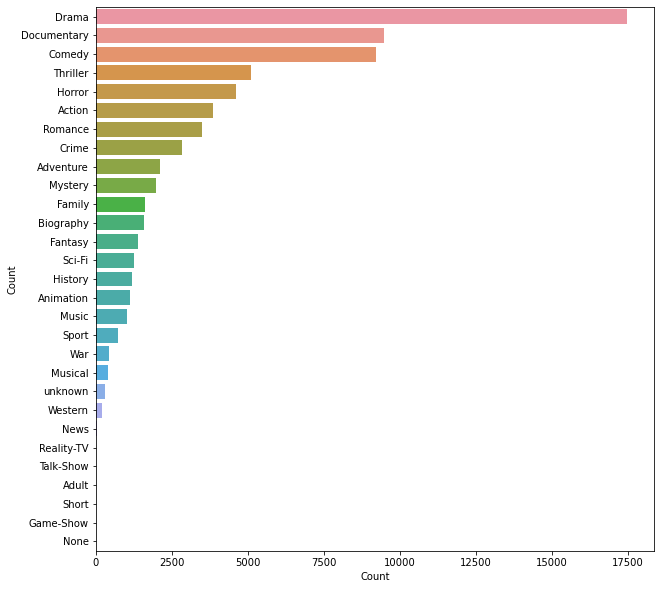

In [78]:
#plot highest to lowest by genre
all_genres = dict(zip(genre, genre_counts))
all_genres_df = pd.DataFrame({'Genre': genre, 'Count': genre_counts})
all_genres_df.fillna('None',inplace=True)
import matplotlib.pyplot as plt 
import seaborn as sns

g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()




In [79]:
#clean up genre columns
remove_columns_genre = all_genres_df.loc[(all_genres_df.Count<=1624) & (all_genres_df.Genre!='unknown'),: ].Genre.unique()
for i in range(0,len(remove_columns_genre)):
    remove_columns_genre[i]= 'genre_'+ remove_columns_genre[i]
df2.drop(remove_columns_genre,axis=1,inplace=True)   


In [80]:
#move average rating to the end of the dataframe
df2['AverageRating']=df2.averageRating
df2.drop(columns=['averageRating'],inplace=True)


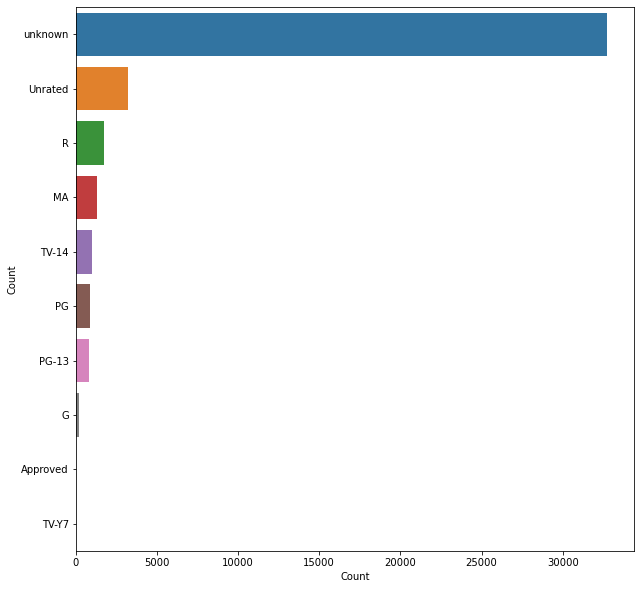

In [81]:
#plot highest to lowest by rated
all_rated = dict(zip(rate, rate_counts))
all_rated_counts = pd.DataFrame({'Rated': rate, 'Count': rate_counts})

# all_rated_counts.fillna('None',inplace=True)

r = all_rated_counts.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=r, x= "Count", y = "Rated")
ax.set(ylabel = 'Count')
plt.show()


Data ready, export to csv file, ready to use

In [82]:
#clean up rated columns, and create rating bins
df2.drop(['rated_Approved','rated_TV-Y7'],axis=1,inplace=True)
df2['budget']=df2['budget'].astype(int)
df2['rating_bins'] = pd.cut(df2.AverageRating, [0, 4, 5, 6, 7, 8, 10], labels=['F','E','D','C','B','A'],  right=False)
df2.to_csv('./data/clean_raw_data.csv',index=False)

Machine learning part

In [83]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('./data/clean_raw_data.csv')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,tconst,primaryTitle,startYear,runtimeMinutes,number_of_languages,budget,is_in_collection,release_month,popular_actors_count,rated_unknown,...,genre_Drama,genre_Thriller,genre_Comedy,genre_Action,genre_unknown,genre_Crime,genre_Horror,genre_Romance,AverageRating,rating_bins
0,tt0013274,Istoriya grazhdanskoy voyny,2021,133,7,0,0,5,0,1,...,0,0,0,0,0,0,0,0,6.4,C
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020,70,10,0,0,9,0,1,...,1,0,0,0,0,0,0,0,6.4,C
2,tt0069049,The Other Side of the Wind,2018,122,22,12000000,0,11,0,0,...,1,0,0,0,0,0,0,0,6.7,C
3,tt0083060,The Drive to Win,2019,0,3,0,0,4,0,1,...,1,0,0,0,0,0,0,0,6.6,C
4,tt0100275,The Wandering Soap Opera,2017,80,8,0,0,5,0,1,...,1,0,1,0,0,0,0,0,6.4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42049,tt9916132,The Mystery of a Buryat Lama,2018,94,1,0,0,8,0,1,...,0,0,0,0,0,0,0,0,4.0,E
42050,tt9916190,Safeguard,2020,95,6,0,0,11,0,1,...,0,1,0,1,0,0,0,0,3.6,F
42051,tt9916270,Il talento del calabrone,2020,84,4,0,0,11,0,1,...,0,1,0,0,0,0,0,0,5.8,D
42052,tt9916362,Coven,2020,92,23,0,0,10,0,0,...,1,0,0,0,0,0,0,0,6.4,C


In [84]:
df.columns

Index(['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes',
       'number_of_languages', 'budget', 'is_in_collection', 'release_month',
       'popular_actors_count', 'rated_unknown', 'rated_R', 'rated_MA',
       'rated_Unrated', 'rated_PG', 'rated_TV-14', 'rated_PG-13', 'rated_G',
       'genre_Mystery', 'genre_Adventure', 'genre_Documentary', 'genre_Drama',
       'genre_Thriller', 'genre_Comedy', 'genre_Action', 'genre_unknown',
       'genre_Crime', 'genre_Horror', 'genre_Romance', 'AverageRating',
       'rating_bins'],
      dtype='object')

In [85]:
selected_features = df.iloc[:,2:28].values

In [86]:
y = df.iloc[:,29].values.reshape(-1,1)

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=2,test_size=.7)

In [88]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300,max_features = 'sqrt',min_samples_leaf=2)
rf = rf.fit(X_train_scaled, y_train)


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.8218645948945617
Testing Data Score: 0.3475350796724765


In [ ]:
import joblib
joblib.dump(rf, "./models/random_forest.joblib")

['./models/random_forest.joblib']

Grid Search

In [91]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
search_space = {
    'n_estimators': [50,200,300],
    'max_features':['sqrt',0.8,0.2],
    'min_samples_leaf' : [1,2]
    
}

In [92]:
# Train the model with GridSearch
grid = GridSearchCV(rf, search_space, verbose=3)

In [93]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.315 total time=   2.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.311 total time=   2.1s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.327 total time=   2.7s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.302 total time=   2.1s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=0.334 total time=   2.2s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=200;, score=0.319 total time=   8.0s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=200;, score=0.319 total time=   9.8s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=200;, score=0.327 total time=  12.0s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=200;, score=0.300 total time=  12.3s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=200;, score=0.326 total time=  10.1s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=300;, score=0.323 total time=  17.2s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=300;, score=0.322 total time=  20.1s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=300;, score=0.319 total time=  18.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=300;, score=0.306 total time=  17.3s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=sqrt, min_samples_leaf=1, n_estimators=300;, score=0.332 total time=  19.5s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.331 total time=   1.9s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.344 total time=   1.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.343 total time=   1.7s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.325 total time=   1.6s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=50;, score=0.357 total time=   2.3s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.344 total time=   6.9s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.349 total time=   7.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.344 total time=   7.9s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.334 total time=   7.3s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=200;, score=0.362 total time=   7.6s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.343 total time=  14.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.347 total time=  12.3s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.346 total time=  10.0s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.335 total time=   9.0s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=sqrt, min_samples_leaf=2, n_estimators=300;, score=0.357 total time=   9.9s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=0.8, min_samples_leaf=1, n_estimators=50;, score=0.313 total time=   6.3s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=0.8, min_samples_leaf=1, n_estimators=50;, score=0.314 total time=   6.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=0.8, min_samples_leaf=1, n_estimators=50;, score=0.319 total time=   3.8s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=0.8, min_samples_leaf=1, n_estimators=50;, score=0.314 total time=   3.7s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=0.8, min_samples_leaf=1, n_estimators=50;, score=0.317 total time=   3.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=0.8, min_samples_leaf=1, n_estimators=200;, score=0.314 total time=  23.7s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=0.8, min_samples_leaf=1, n_estimators=200;, score=0.315 total time=  17.7s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=0.8, min_samples_leaf=1, n_estimators=200;, score=0.317 total time=  23.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=0.8, min_samples_leaf=1, n_estimators=200;, score=0.308 total time=  19.8s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=0.8, min_samples_leaf=1, n_estimators=200;, score=0.324 total time=  20.3s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=0.8, min_samples_leaf=1, n_estimators=300;, score=0.308 total time=  32.9s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=0.8, min_samples_leaf=1, n_estimators=300;, score=0.321 total time=  27.6s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=0.8, min_samples_leaf=1, n_estimators=300;, score=0.319 total time=  31.6s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=0.8, min_samples_leaf=1, n_estimators=300;, score=0.309 total time=  25.9s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=0.8, min_samples_leaf=1, n_estimators=300;, score=0.328 total time=  23.0s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=0.8, min_samples_leaf=2, n_estimators=50;, score=0.321 total time=   3.7s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=0.8, min_samples_leaf=2, n_estimators=50;, score=0.321 total time=   4.5s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=0.8, min_samples_leaf=2, n_estimators=50;, score=0.327 total time=   4.6s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=0.8, min_samples_leaf=2, n_estimators=50;, score=0.325 total time=   2.9s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=0.8, min_samples_leaf=2, n_estimators=50;, score=0.339 total time=   4.6s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=0.8, min_samples_leaf=2, n_estimators=200;, score=0.329 total time=  15.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END max_features=0.8, min_samples_leaf=2, n_estimators=200;, score=0.329 total time=  17.5s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END max_features=0.8, min_samples_leaf=2, n_estimators=200;, score=0.333 total time=  17.4s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END max_features=0.8, min_samples_leaf=2, n_estimators=200;, score=0.318 total time=  18.8s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END max_features=0.8, min_samples_leaf=2, n_estimators=200;, score=0.336 total time=  16.2s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END max_features=0.8, min_samples_leaf=2, n_estimators=300;, score=0.320 total time=  20.6s


c:\Users\datqu\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'max_features': 0.2, 'min_samples_leaf': 2, 'n_estimators': 300}
0.5645328010063169
